['mass_all']
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

naive vs. infected: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.069e-01 U_stat=9.600e+01
infected vs. combo: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.069e-01 U_stat=1.290e+02
combo vs. BNZ: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.290e-01 U_stat=1.420e+02
naive vs. combo: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.000e+00 U_stat=1.130e+02
infected vs. BNZ: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.197e-02 U_stat=1.580e+02
naive vs. BNZ: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.466e-01 U_stat=1.480e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00

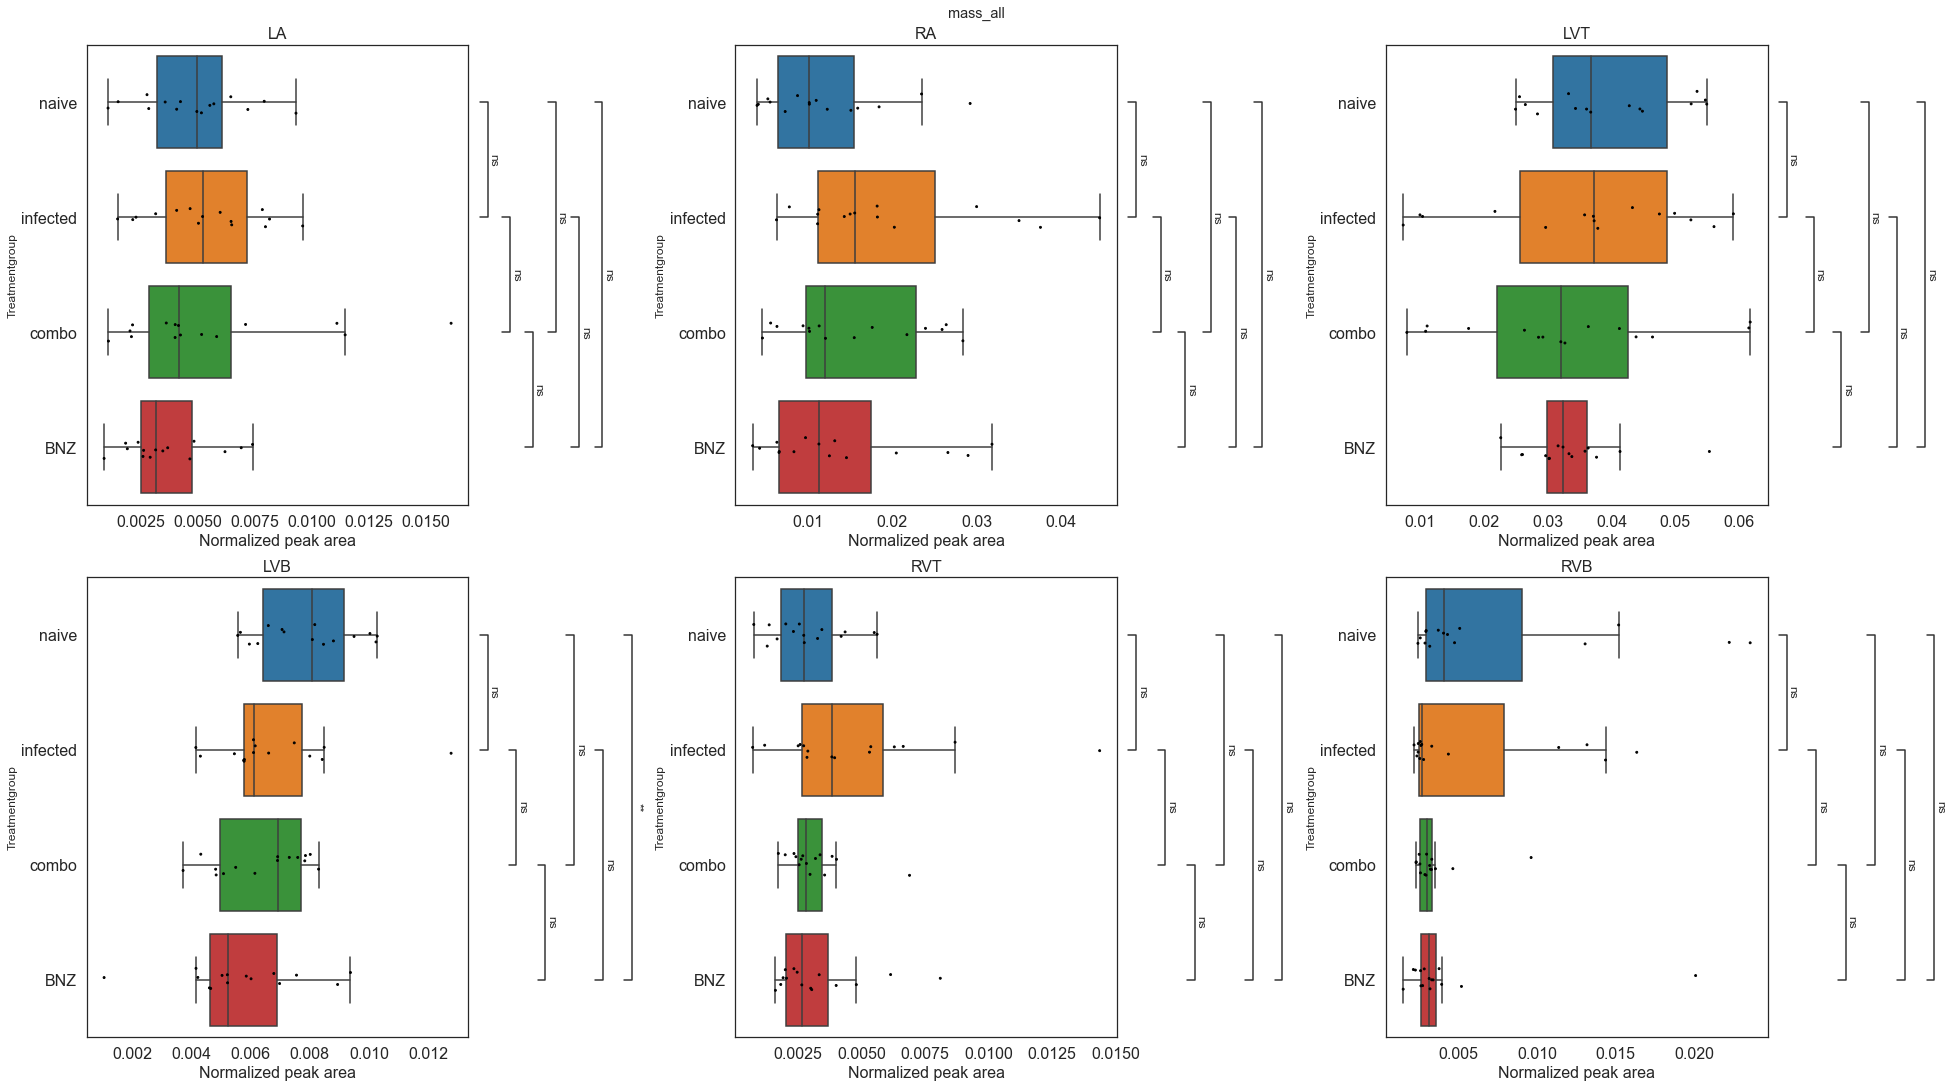

In [1]:

import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

data_a = pandas.read_csv('03172021-PE-M-F-treatment-sum-all-peak.csv')

data_LA = data_a[data_a["organ"].isin(["LA"])]
data_RA = data_a[data_a["organ"].isin(["RA"])]
data_LVT = data_a[data_a["organ"].isin(["LV_top"])]
data_LVB = data_a[data_a["organ"].isin(["LV_bottom"])]
data_RVT = data_a[data_a["organ"].isin(["RV_top"])]
data_RVB = data_a[data_a["organ"].isin(["RV_bottom"])]

mass_list = ['mass_all']
print(mass_list)

# change the theme of the plot
sns.set_theme(style="white")

plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

order = ["naive", 'infected', 'combo', 'BNZ']

mass_list_number = 1
for mass in mass_list:
    fig, axes = plt.subplots(2, 3, figsize=(27, 15), constrained_layout=True)
    fig.suptitle(mass)
    g1 = sns.boxplot(ax=axes[0, 0], x=data_LA[str(mass)], y=data_LA['Treatmentgroup'], order = order, palette="tab10", showfliers = False)
    g1 = sns.stripplot(ax=axes[0, 0], x=data_LA[str(mass)], y=data_LA['Treatmentgroup'], order = order, dodge=True, color = "black", size=2, edgecolor="black", linewidth=.9)
    axes[0, 0].set_title("LA", fontsize=16)
    axes[0, 0].set_xlabel('Normalized peak area', fontsize=16)
    #axes[0, 0].set_ylabel('', fontsize=16)
    
    annot_1 = Annotator(g1, [("naive", "infected"), ("naive", "combo"), ("naive", "BNZ"), ("infected", "combo"), ("infected", "BNZ"), ("combo", "BNZ")], y=data_LA['Treatmentgroup'], x=data_LA[str(mass)], order=order, orient='h')
    annot_1.configure(test='Mann-Whitney', comparisons_correction="BH", correction_format="replace", text_format='star', loc='outside', verbose=2)
    annot_1.apply_test()
    g1, test_results = annot_1.annotate()

    g2 = sns.boxplot(ax=axes[0, 1], x=data_RA[str(mass)], y=data_RA['Treatmentgroup'], order = ["naive", 'infected', 'combo', 'BNZ'], palette="tab10", showfliers = False)
    g2 = sns.stripplot(ax=axes[0, 1], x=data_RA[str(mass)], y=data_RA['Treatmentgroup'], order = ["naive", 'infected', 'combo', 'BNZ'], dodge=True, color = "black", size=2, edgecolor="black", linewidth=.9)
    axes[0, 1].set_title("RA", fontsize=16)
    axes[0, 1].set_xlabel('Normalized peak area', fontsize=16)
    #axes[0, 1].set_ylabel('', fontsize=16)
    
    annot_2 = Annotator(g2, [("naive", "infected"), ("naive", "combo"), ("naive", "BNZ"), ("infected", "combo"), ("infected", "BNZ"), ("combo", "BNZ")], y=data_RA['Treatmentgroup'], x=data_RA[str(mass)], order=order, orient='h')
    annot_2.configure(test='Mann-Whitney', comparisons_correction="BH", correction_format="replace", text_format='star', loc='outside', verbose=2)
    annot_2.apply_test()
    g2, test_results = annot_2.annotate()

    g3 = sns.boxplot(ax=axes[0, 2], x=data_LVT[str(mass)], y=data_LVT['Treatmentgroup'], order = ["naive", 'infected', 'combo', 'BNZ'], palette="tab10", showfliers = False)
    g3 = sns.stripplot(ax=axes[0, 2], x=data_LVT[str(mass)], y=data_LVT['Treatmentgroup'], order = ["naive", 'infected', 'combo', 'BNZ'], dodge=True, color = "black", size=2, edgecolor="black", linewidth=.9)
    axes[0, 2].set_title("LVT", fontsize=16)
    axes[0, 2].set_xlabel('Normalized peak area', fontsize=16)
    #axes[0, 2].set_ylabel('', fontsize=16)
    
    annot_3 = Annotator(g3, [("naive", "infected"), ("naive", "combo"), ("naive", "BNZ"), ("infected", "combo"), ("infected", "BNZ"), ("combo", "BNZ")], y=data_LVT['Treatmentgroup'], x=data_LVT[str(mass)], order=order, orient='h')
    annot_3.configure(test='Mann-Whitney', comparisons_correction="BH", correction_format="replace", text_format='star', loc='outside', verbose=2)
    annot_3.apply_test()
    g3, test_results = annot_3.annotate()
    
    g4 = sns.boxplot(ax=axes[1, 0], x=data_LVB[str(mass)], y=data_LVB['Treatmentgroup'], order = ["naive", 'infected', 'combo', 'BNZ'], palette="tab10", showfliers = False)
    g4 = sns.stripplot(ax=axes[1, 0], x=data_LVB[str(mass)], y=data_LVB['Treatmentgroup'], order = ["naive", 'infected', 'combo', 'BNZ'], dodge=True, color = "black", size=2, edgecolor="black", linewidth=.9)
    axes[1, 0].set_title("LVB", fontsize=16)
    axes[1, 0].set_xlabel('Normalized peak area', fontsize=16)
    #axes[1, 0].set_ylabel('', fontsize=16)
    
    annot_4 = Annotator(g4, [("naive", "infected"), ("naive", "combo"), ("naive", "BNZ"), ("infected", "combo"), ("infected", "BNZ"), ("combo", "BNZ")], y=data_LVB['Treatmentgroup'], x=data_LVB[str(mass)], order=order, orient='h')
    annot_4.configure(test='Mann-Whitney', comparisons_correction="BH", correction_format="replace", text_format='star', loc='outside', verbose=2)
    annot_4.apply_test()
    g4, test_results = annot_4.annotate()
    
    g5 = sns.boxplot(ax=axes[1, 1], x=data_RVT[str(mass)], y=data_RVT['Treatmentgroup'], order = ["naive", 'infected', 'combo', 'BNZ'], palette="tab10", showfliers = False)
    g5 = sns.stripplot(ax=axes[1, 1], x=data_RVT[str(mass)], y=data_RVT['Treatmentgroup'], order = ["naive", 'infected', 'combo', 'BNZ'], dodge=True, color = "black", size=2, edgecolor="black", linewidth=.9)
    axes[1, 1].set_title("RVT", fontsize=16)
    axes[1, 1].set_xlabel('Normalized peak area', fontsize=16)
    #axes[1, 1].set_ylabel('', fontsize=16)
    
    annot_5 = Annotator(g5, [("naive", "infected"), ("naive", "combo"), ("naive", "BNZ"), ("infected", "combo"), ("infected", "BNZ"), ("combo", "BNZ")], y=data_RVT['Treatmentgroup'], x=data_RVT[str(mass)], order=order, orient='h')
    annot_5.configure(test='Mann-Whitney', comparisons_correction="BH", correction_format="replace", text_format='star', loc='outside', verbose=2)
    annot_5.apply_test()
    g5, test_results = annot_5.annotate()
    
    g6 = sns.boxplot(ax=axes[1, 2], x=data_RVB[str(mass)], y=data_RVB['Treatmentgroup'], order = ["naive", 'infected', 'combo', 'BNZ'], palette="tab10", showfliers = False)
    g6 = sns.stripplot(ax=axes[1, 2], x=data_RVB[str(mass)], y=data_RVB['Treatmentgroup'], order = ["naive", 'infected', 'combo', 'BNZ'], dodge=True, color = "black", size=2, edgecolor="black", linewidth=.9)
    axes[1, 2].set_title("RVB", fontsize=16)
    axes[1, 2].set_xlabel('Normalized peak area', fontsize=16)
    #axes[1, 2].set_ylabel('', fontsize=16)
    
    annot_6 = Annotator(g6, [("naive", "infected"), ("naive", "combo"), ("naive", "BNZ"), ("infected", "combo"), ("infected", "BNZ"), ("combo", "BNZ")], y=data_RVB['Treatmentgroup'], x=data_RVB[str(mass)], order=order, orient='h')
    annot_6.configure(test='Mann-Whitney', comparisons_correction="BH", correction_format="replace", text_format='star', loc='outside', verbose=2)
    annot_6.apply_test()
    g6, test_results = annot_6.annotate()
    
    #sns.move_legend(g1, "upper right")
    #sns.move_legend(g2, "upper right")
    #sns.move_legend(g3, "upper right")
    #sns.move_legend(g4, "upper right")
    #sns.move_legend(g5, "upper right")
    #sns.move_legend(g6, "upper right")
    g1.legend([],[], frameon=False)
    g2.legend([],[], frameon=False)
    g3.legend([],[], frameon=False)
    g4.legend([],[], frameon=False)
    g5.legend([],[], frameon=False)
    g6.legend([],[], frameon=False)
    plt.savefig("6-HS-boxplot-treatment-sum-all-peaks-" + str(mass) + ".png", dpi=300, bbox_inches='tight')
    mass_list_number += 1
